In [15]:
import pyrealsense2 as rs
import numpy as np
import sys
import matplotlib.pyplot as plt
import cv2

sys.path.append("../")

from SurfaceContact.scene import extractBodyPixels, bodyCentroid
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
pipeline = rs.pipeline()
pipeline.start()


In [3]:
frames = pipeline.wait_for_frames()
rgb = frames.get_color_frame()
rgb_img = np.asanyarray(rgb.get_data())
depth = frames.get_depth_frame()
pc = rs.pointcloud()
points = pc.calculate(depth)
v = points.get_vertices()
verts = np.asanyarray(v).view(np.float32).reshape(-1, 3) 

depth_img = np.asanyarray(depth.get_data())

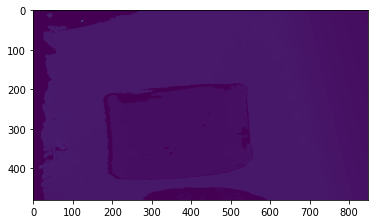

In [4]:
plt.imshow(depth_img)

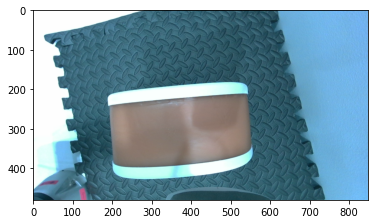

In [5]:
plt.imshow(rgb_img)

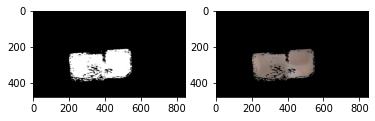

In [6]:
body_color_rgb = (227,124,100)
body_hsv_rad = (5,150,150)
scene = rgb_img

mask = extractBodyPixels(scene,body_color_rgb,body_hsv_rad)
result = cv2.bitwise_and(scene,scene,mask = mask)
plt.subplot(1,2,1)
plt.imshow(mask,cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(result)
plt.show()

In [7]:
verts = verts.reshape(scene.shape)

In [16]:
centroid = bodyCentroid(mask)

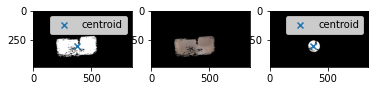

In [41]:
from SurfaceContact.utils import patch_pixel_indx
patch_pixel_rad = 50

cx,cy = np.array(centroid,dtype=int)
h,w = mask.shape

patch_indx = patch_pixel_indx(cx,cy,h,w,patch_pixel_rad)
patch_mask = np.zeros(mask.shape)
for i,j in patch_indx:
    patch_mask[i,j] = mask[i,j]


plt.subplot(1,3,1)

plt.scatter(cx,cy,marker="x",label = 'centroid')
plt.legend()
plt.imshow(mask,cmap = 'gray')
plt.subplot(1,3,2)

plt.imshow(result)
plt.subplot(1,3,3)
plt.imshow(patch_mask,cmap = 'gray')
plt.scatter(cx,cy,marker="x",label = 'centroid')
plt.legend()

plt.show()

In [29]:
centroid

array([377.15990619, 301.54737547])

In [11]:
pipeline.stop()